<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Parcial2/Punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# @title Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.4-py3-none-a

In [21]:
# @title Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [22]:
# @title Ingreso de la cancion y toma de la muestra
CAC = input("Ingrese el link de su cancion favorita: ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([20])    # El punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

XC_1 = XC[0,:,0]
#XC1 = XC.mean(axis=-1).T

Ingrese el link de su cancion favorita: https://www.youtube.com/watch?v=kXmvE3EecfA&pp=ygUQbXkgb3JkaW5hcnkgbGlmZQ%3D%3D
[youtube] Extracting URL: https://www.youtube.com/watch?v=kXmvE3EecfA&pp=ygUQbXkgb3JkaW5hcnkgbGlmZQ%3D%3D
[youtube] kXmvE3EecfA: Downloading webpage
[youtube] kXmvE3EecfA: Downloading android player API JSON
[youtube] kXmvE3EecfA: Downloading ios player API JSON
[youtube] kXmvE3EecfA: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=kXmvE3EecfA
[youtube] kXmvE3EecfA: Downloading webpage
[youtube] kXmvE3EecfA: Downloading android player API JSON
[youtube] kXmvE3EecfA: Downloading ios player API JSON
[youtube] kXmvE3EecfA: Downloading m3u8 information
[info] kXmvE3EecfA: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    3.65MiB


In [23]:
# @title Definicion señal portadora
Ap = float(max(abs(XC_1)))    #considerando Im=1
SP = Ap*np.cos(2*np.pi*15000*t)

In [24]:
# @title Modulacion de la señal
MOD = (1+XC_1/Ap)*SP

In [32]:
# @title Transformadas de Fourier de las señales

VF = np.fft.rfftfreq(len(SP),1/fs)    #vector de frecuencias
TE = np.fft.rfft(XC_1)    #transformada de la entrada
TP = np.fft.rfft(SP)    #transformada portadora
TM = np.fft.rfft(MOD)   #transformada modulacion

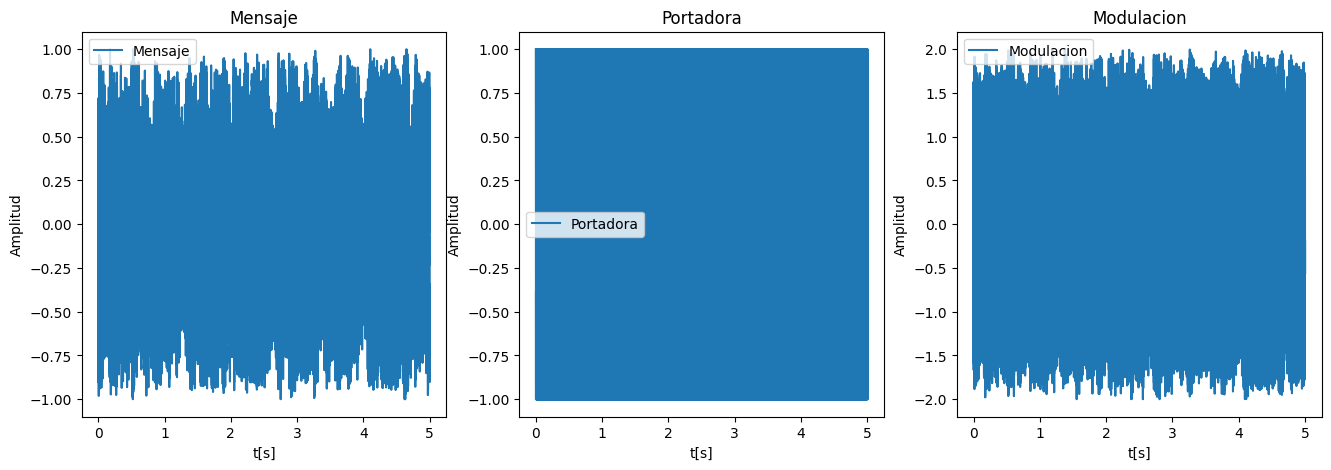

In [33]:
# @title Gráficas en el tiempo

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Mensaje')
plt.plot(t,XC1,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(132)
plt.title('Portadora')
plt.plot(t,SP,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(133)
plt.title('Modulacion')
plt.plot(t,MOD,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


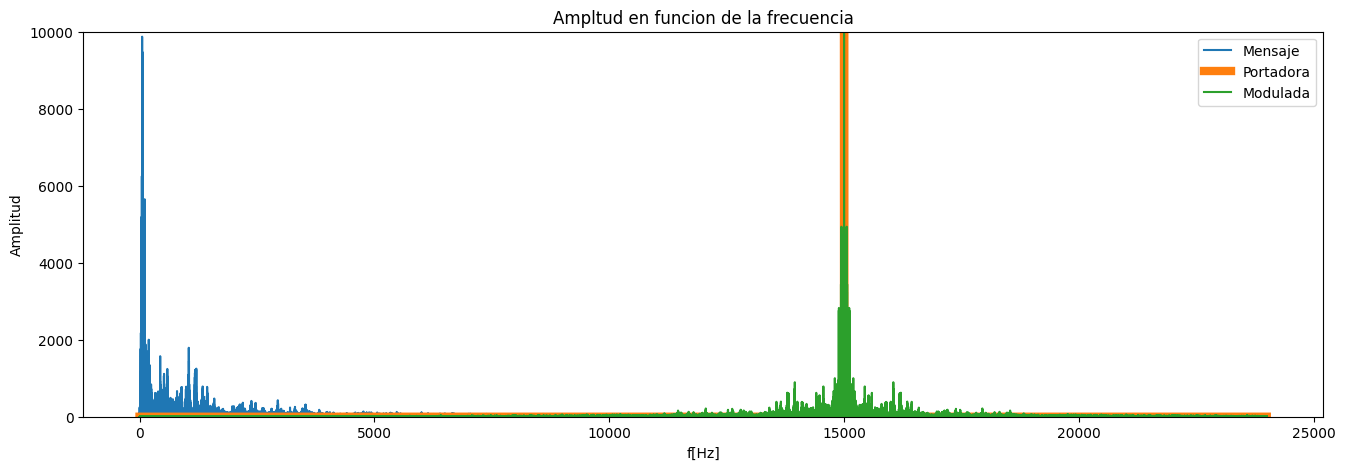

In [48]:
# @title Gráficas en la frecuencia

plt.figure(figsize=(16,5))
plt.ylim([min(abs(XC_1)), 10000*max(abs(XC_1))])
plt.plot(VF,TE,label='Mensaje')
plt.plot(VF,TP,label='Portadora',linewidth=6)
plt.plot(VF,TM,label='Modulada')
plt.title('Ampltud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [49]:
Audio(XC_1.T,rate=fs)

In [29]:
Audio(SP,rate=fs)

In [30]:
Audio(MOD,rate=fs)